In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load the training and testing datasets
train_data = pd.read_csv("C:\\Users\\kanni\\Downloads\\creditcard.csv\\fraudTrain.csv") 
test_data = pd.read_csv("C:\\Users\\kanni\\Downloads\\creditcard.csv\\fraudTest.csv")  

In [3]:
# Check dataset shapes
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

Train shape: (1296675, 23)
Test shape: (555719, 23)


In [4]:
# Target column: 'is_fraud'
# Drop unnecessary columns like transaction ID or time if present
cols_to_drop = ['trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num', 'unix_time', 'merchant', 'category']
train_data = train_data.drop(columns=cols_to_drop, errors='ignore')
test_data = test_data.drop(columns=cols_to_drop, errors='ignore')

In [5]:
# Convert categorical columns to numeric (One-hot encoding)
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [6]:
# Align columns of test set to train set
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']
X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

In [7]:
# Align columns (in case of mismatch due to one-hot encoding)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [8]:
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
# Predict
y_pred = model.predict(X_test)

In [10]:
# Evaluate
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9954725319810912

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719


Confusion Matrix:
 [[553203    371]
 [  2145      0]]


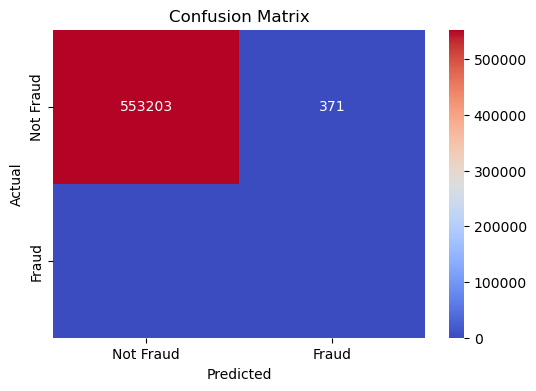

In [11]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()